# Linear Regression Assignment

## Problem Statement
A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. So that they are prepared to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

#### The company wants to know 

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands


## Business Goal:We  are required to model the demand for shared bikes with the available independent variable  to understand how exactly the demands vary with different features.So that **BoomBikes**  can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

#### Bike Sharing dataset
day.csv have the following fields:
	
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : whether day is a holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


### Importing libraries and packages

In [794]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.stats.api as sms

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Reading and Understanding Data

In [795]:
## Reading the Data
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [796]:
bike_sharing_df.shape

(730, 16)

### There are 16 columns and 730 rows in the dataset

In [797]:
## Checking columns available
bike_sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

##### We have following columns - 
'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp',
'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'.
Lets give proper name to some of the column


In [798]:
new_column_names = {
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'count',
}

# Rename columns using the dictionary
bike_sharing_df = bike_sharing_df.rename(columns=new_column_names) 
# New column names
bike_sharing_df.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [799]:
## Checking column not null count and Data type
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   year        730 non-null    int64  
 4   month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


* **Some columns are categorical in nature (like mnth, season, weekday and weathersit), however, their datatype is int64 which needs to be handled later during the data cleaning process.**
* **Some columns (like instant, dteday, casual, registered) can be dropped as they are irrelevant/redundant to our analysis and model building.**

In [800]:
bike_sharing_df.describe()

,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [801]:
### Most of the record has temperature between 13 to 26 degree
### Max number of times humidity is between 52 to 72

### Data Quality Check And Data Cleaning

In [802]:
## Check whether there are any null value in any of the column
bike_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

##### There are no null value in any of the columns

In [803]:
## Check if there any duplicate rows
num_of_duplicate_rows = bike_sharing_df.duplicated().sum()
print("\nNumber of duplicates (all columns):", num_of_duplicate_rows)

## Let check duplicate by dropping instant column as it is acting as index and has different value
duplicates_ignoring_instant = bike_sharing_df.drop('instant', axis=1)
num_of_duplicate_rows = duplicates_ignoring_instant.duplicated().sum()
print("\nNumber of duplicates (ignoring instant):", num_of_duplicate_rows)


Number of duplicates (all columns): 0

Number of duplicates (ignoring instant): 0


#####  There are no duplicate rows

In [804]:
unqiue_column_count=bike_sharing_df.nunique()
## extracting column which has only single value across all row of dataset
single_value_column_name = unqiue_column_count[unqiue_column_count.values == 1].index
print('number of column with only single value in all the rows- ',single_value_column_name.size)

number of column with only single value in all the rows-  0


In [805]:
## If the count of unique value is same as the length of dataset, then this mean all the values are different
nonunique_val_column_name = unqiue_column_count[unqiue_column_count.values == len(bike_sharing_df)].index
print('number of column with all unique value - ',nonunique_val_column_name)

number of column with all unique value -  Index(['instant', 'dteday'], dtype='object')


##### There are no column that has only single unique value.
#####  dteday is the only column that has different value for each row. We are any way planning to drop it later.

In [806]:
## Let's create a copy of the dataset to perform cleaning operation
bike_sharing_df_cpy = bike_sharing_df.copy()

#### Lets Drop 'casual','registered','instant' as they are not useful in our analysis
#### We also need to delete dteday, but we will do it later in the code

In [807]:
bike_sharing_df_cpy.drop(columns= {'casual','registered','instant'}, inplace=True)

In [808]:
bike_sharing_df_cpy.shape

(730, 13)

In [809]:
bike_sharing_df_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   year        730 non-null    int64  
 3   month       730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  humidity    730 non-null    float64
 11  windspeed   730 non-null    float64
 12  count       730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


#### Season, Weathersit, mnth, weekday are categorical variable, but there data type is int. Lets map the int value to proper label value for EDA

In [810]:
## Replace the numbers value in season to different String values of season as per data dictionary
bike_sharing_df_cpy.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

## categorize weathersit as good,moderate,bad,severe
bike_sharing_df_cpy.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

## Replace the month number with month name
bike_sharing_df_cpy['month'] = bike_sharing_df_cpy['month'].apply(lambda x: calendar.month_name[x])


In [811]:
## Let figure of Day name for value in weekday column 
bike_sharing_df_cpy['day_name'] = pd.to_datetime(bike_sharing_df_cpy.dteday, format="%d-%m-%Y").dt.day_name()
bike_sharing_df_cpy.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,day_name
0,01-01-2018,spring,0,January,0,6,0,moderate,14.110847,18.18125,80.5833,10.749882,985,Monday
1,02-01-2018,spring,0,January,0,0,0,moderate,14.902598,17.68695,69.6087,16.652113,801,Tuesday
2,03-01-2018,spring,0,January,0,1,1,good,8.050924,9.47025,43.7273,16.636703,1349,Wednesday
3,04-01-2018,spring,0,January,0,2,1,good,8.200000,10.60610,59.0435,10.739832,1562,Thursday
4,05-01-2018,spring,0,January,0,3,1,good,9.305237,11.46350,43.6957,12.522300,1600,Friday


In [812]:
#### Value 0 in weekday represent Wednesday, 1 Thursday ........ 6 Tuesday. Let map them

In [813]:
bike_sharing_df_cpy.weekday.replace({1: 'Wenesday',2: 'Thursday',3: 'Friday',4: 'Saturday',5: 'Sunday',6: 'Monday',0: 'Tuesday'},inplace = True)

In [814]:
#### Lets drop the dteday,day_name column as it is no longer needed.
bike_sharing_df_cpy.drop(columns= {'dteday','day_name'}, inplace=True)

In [815]:
bike_sharing_df_cpy.info()
bike_sharing_df_cleaned = bike_sharing_df_cpy.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Exploratory Data Analysis (EDA)

In [816]:
#### Defining all the required labels for all the columns
column_titles = {
    'season': 'Season',
    'year': 'Year',
    'month': 'Month',
    'holiday': 'Holiday',
    'weekday': 'isWeekDay?',
    'windspeed': 'Wind Speed',
    'weathersit': 'Weather Condition',
    'workingday': 'workingday',
    'count': 'Count of bike rented', 
    'humidity': 'Humidity',
    'temp': 'Temperature',
    'atemp': 'Feel Temperature'}


### Univariate Analysis

In [817]:
# Defining function to show bar chart containing percentage of column values
def plot_count_percentage(df, column, ax=None):
    """
    Generates a bar chart containing percentage of column values.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column (str): The column name for which the bar chart will be plotted.
        ax (matplotlib.axes._axes.Axes, optional): The subplot where the chart will be plotted.
            If not provided, a new figure will be created. Defaults to None.
    """
    colors = sns.color_palette('viridis')
    if ax is None:
        plt.figure(figsize=(10, 6))
        ax = plt.gca()

    (bike_sharing_df_cpy[column].value_counts(normalize=True) * 100).plot.bar(color=colors, ax=ax)
    ax.set_ylabel('Percentage')
    ax.set_xlabel(column_titles[column])
    ax.set_title(f'Distribution of {column_titles[column]}')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', xytext=(0, 5),
                    textcoords='offset points')
# function to create barplot related to categorical columns



### Let plot bar chart for following categorical variable
* Season
* workingday
* weekday
* holiday
* month
* year


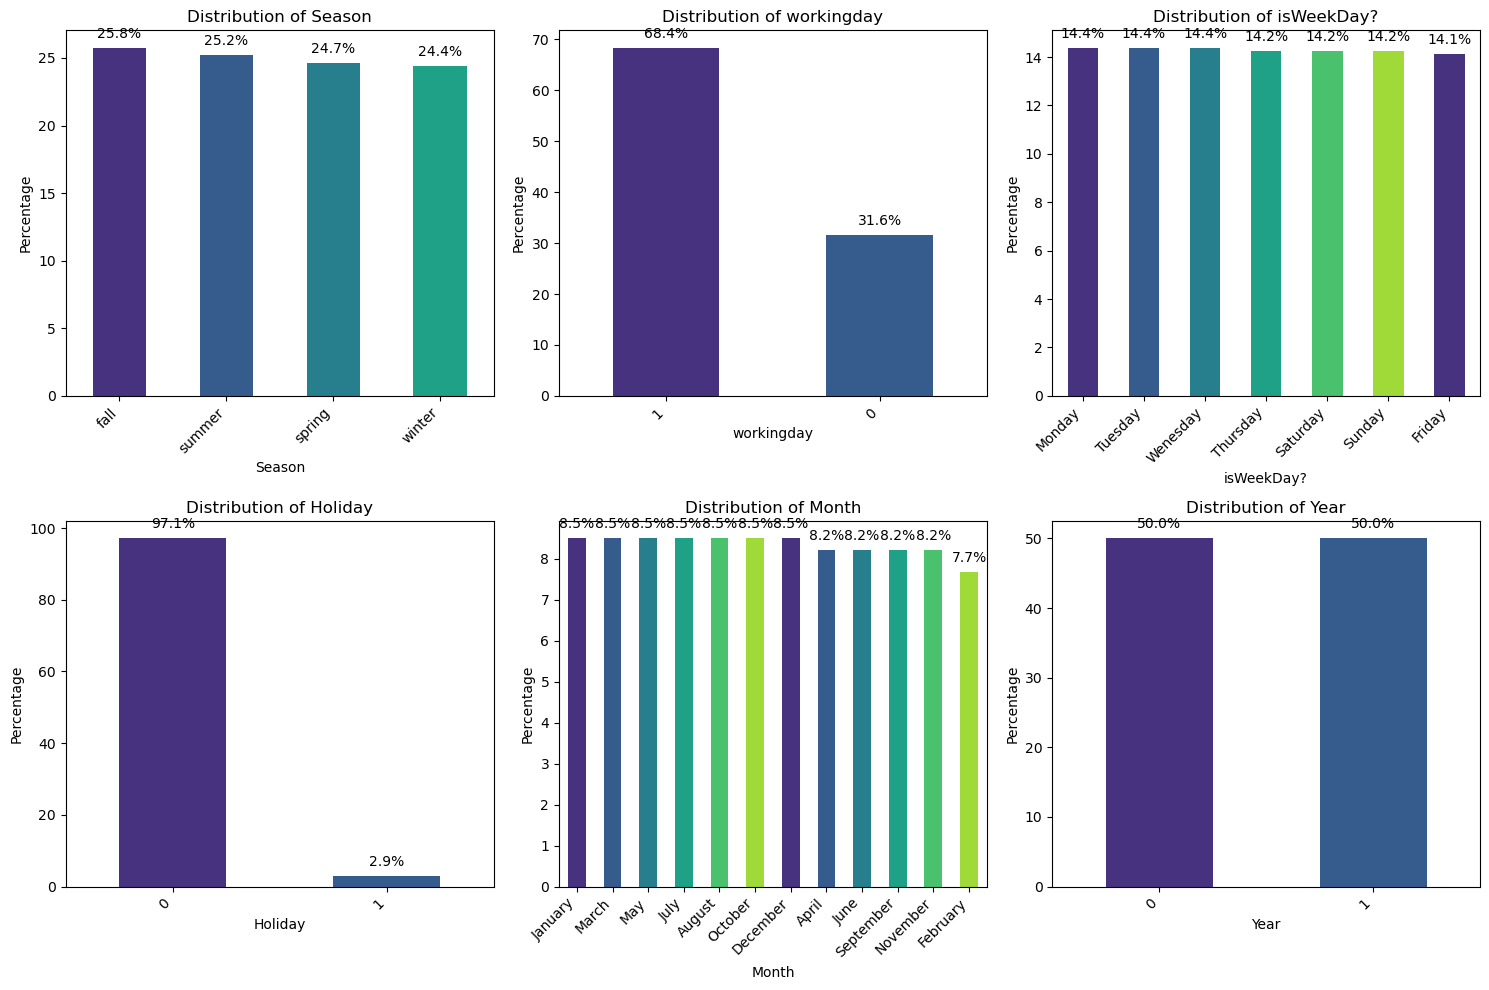

In [818]:


# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust figsize as needed

# Define the order in which you want to plot the categorical variables
categories = ['season', 'workingday', 'weekday', 'holiday', 'month','year']

# Iterate through categories and corresponding subplots
for i, columnName in enumerate(categories):
    row = i // 3  # Integer division for row index
    col = i % 3  # Modulo for column index
    plot_count_percentage(bike_sharing_df_cleaned, columnName, ax=axes[row, col])

    # Set x-axis tick labels with rotation for each subplot
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45, ha='right')

# Remove extra subplots if there are less than 6 categories
if len(categories) < 6:
    for i in range(len(categories), 6):
        fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
plt.show()

### Observation
* We are seeing more records for working and non holiday days. This means more bike usuage in these days.
* Minimal variation is noted for other categorical variables

We need to further analysis with count of bike rentals


### Let do univariate analysis for following fields
* temp
* atemp
* humidity
* windspeed

--- Univariate Analysis for temp ---


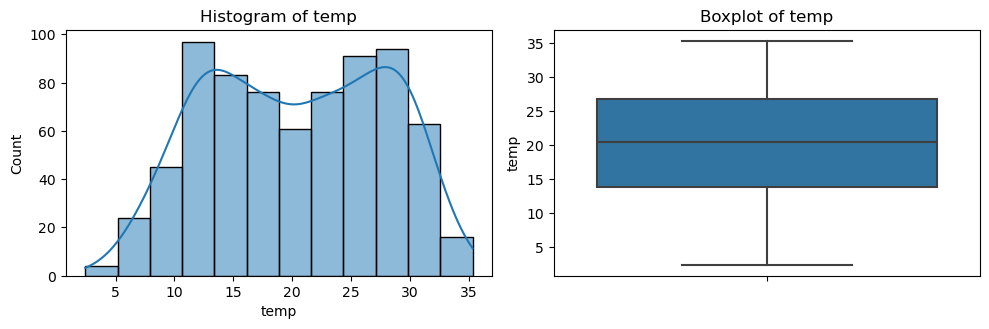

--- Univariate Analysis for atemp ---


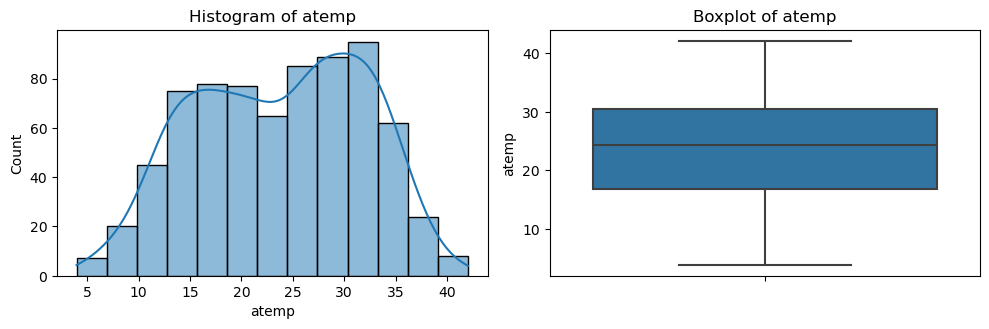

--- Univariate Analysis for humidity ---


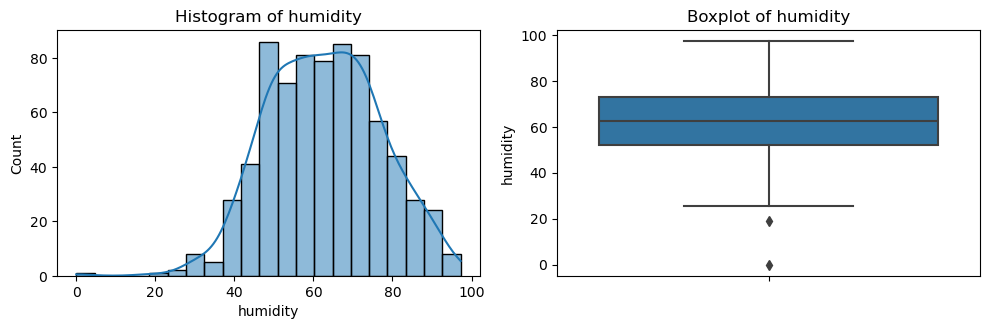

--- Univariate Analysis for windspeed ---


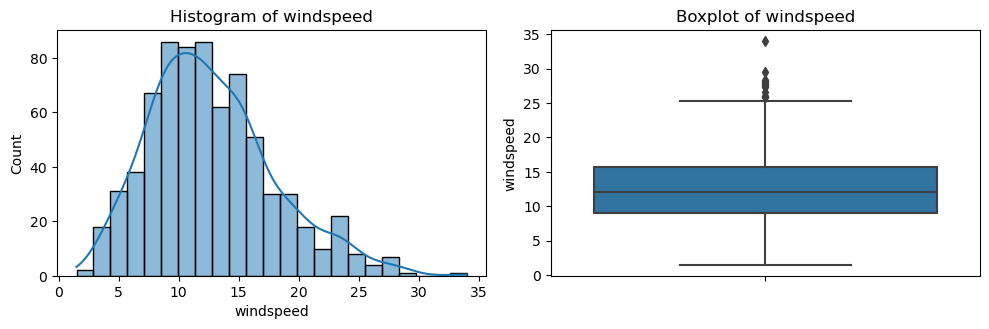

In [819]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed']

for col in numerical_cols:
    print(f"--- Univariate Analysis for {col} ---")

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)  # Create subplots for better layout
    sns.histplot(bike_sharing_df_cleaned[col], kde=True)
    plt.title(f"Histogram of {col}")

    plt.subplot(2, 2, 2)
    sns.boxplot(y=bike_sharing_df_cleaned[col])
    plt.title(f"Boxplot of {col}")

    plt.tight_layout()
    plt.show()

##### from the above plots it is clear that we don't have outliers that required to be remoced

### Observation
* We have seeing majority of the days when bike were rented have high humidity, temp between 15 to 25.
This need further analysis.

### Bivariate analysis

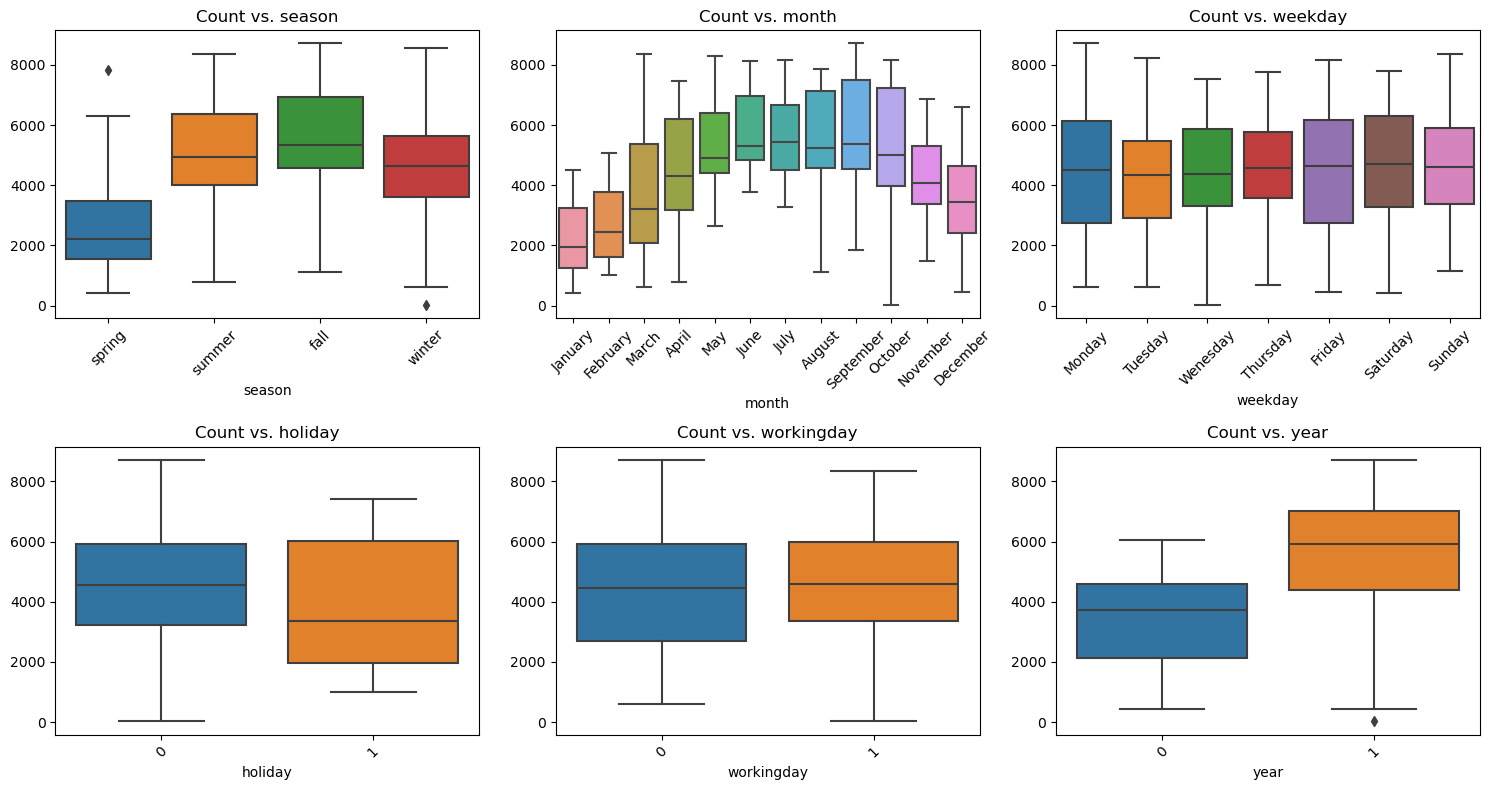

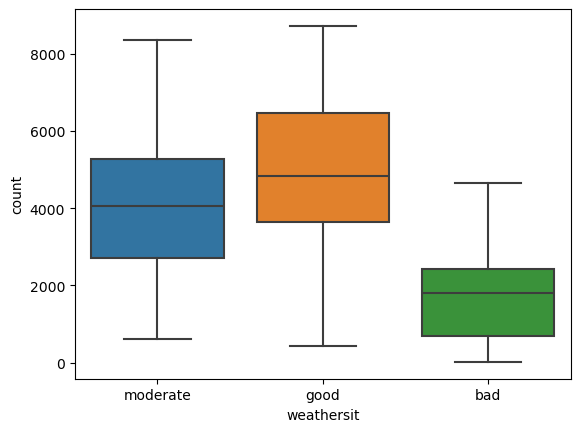

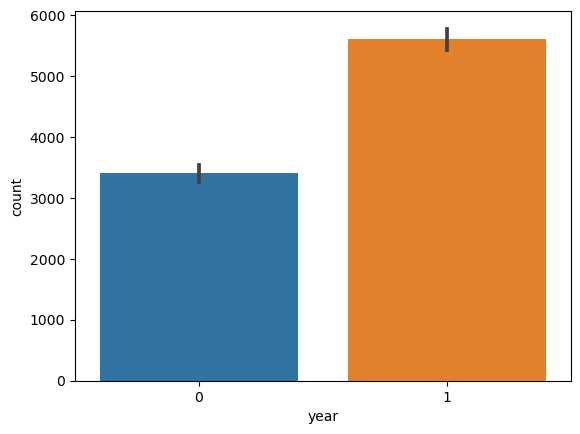

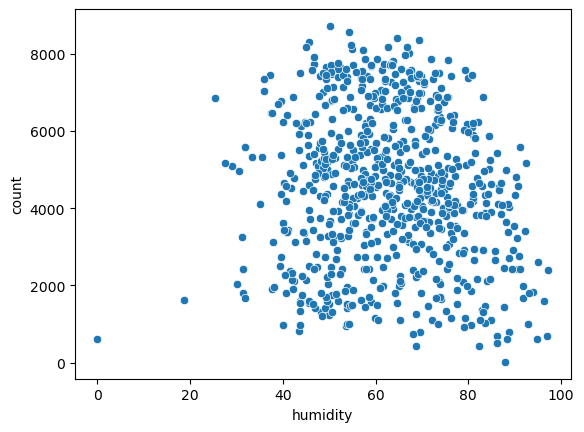

In [820]:


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))  # Adjust rows and columns based on the number of features

# List of categorical features
categorical_features = ['season', 'month', 'weekday',  'holiday', 'workingday', 'year']

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    sns.boxplot(x=feature, y='count', data=bike_sharing_df_cleaned, ax=axes[row, col])
    axes[row, col].set_title(f'Count vs. {feature}')
    axes[row, col].set_ylabel('') 
    axes[row, col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
sns.boxplot(x='weathersit', y='count', data=bike_sharing_df_cleaned)
plt.show()
sns.barplot(x='year',y='count',data=bike_sharing_df_cleaned )
plt.show()
sns.scatterplot(x='humidity',y='count',data=bike_sharing_df_cleaned )
plt.show()


In [821]:
### We are seeing a growth in bike rental from year 2018 to 2019
### Most of the bike rental is concentrated between 40 to 80. There is general dip for humidity above 80. So we can say there is no linear relationship


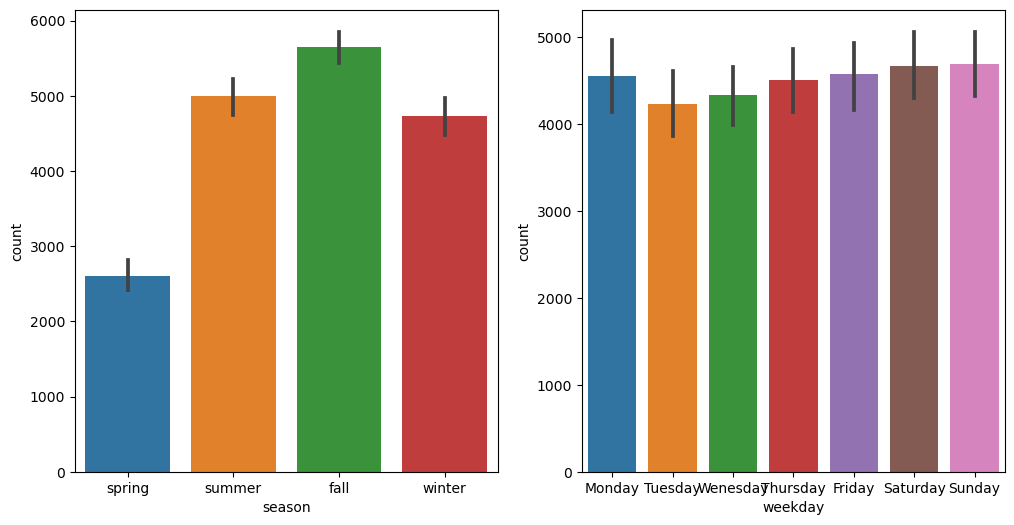

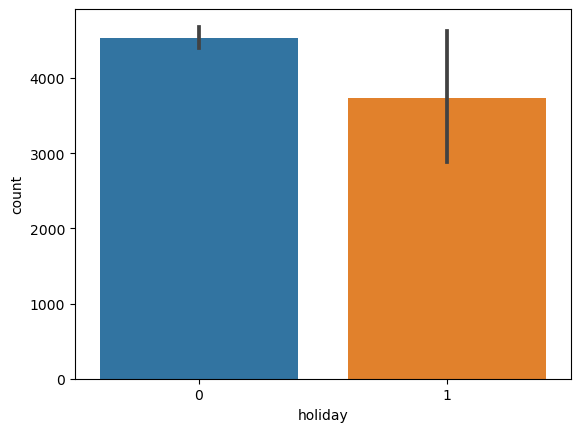

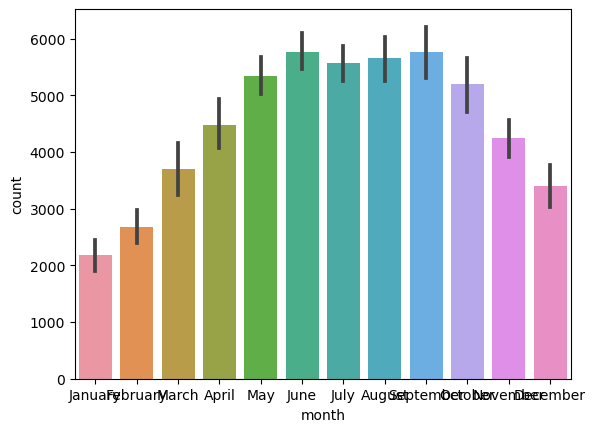

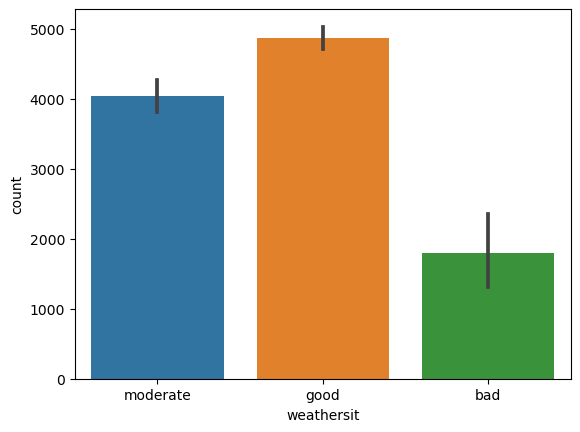

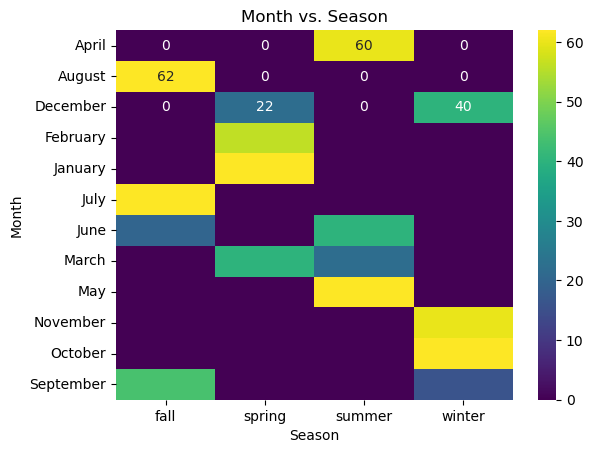

In [822]:
# plotting visualization for season column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x='season',y='count',data=bike_sharing_df_cleaned)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='count',data=bike_sharing_df_cleaned)
plt.show()
sns.barplot(x='holiday',y='count',data=bike_sharing_df_cleaned)
plt.show()
sns.barplot(x='month',y='count',data=bike_sharing_df_cleaned)
plt.show()
sns.barplot(x='weathersit',y='count',data=bike_sharing_df_cleaned)
plt.show()
crosstab_df = pd.crosstab(bike_sharing_df_cleaned['month'], bike_sharing_df_cleaned['season'])
sns.heatmap(crosstab_df, annot=True, cmap='viridis', fmt='d')
plt.xlabel('Season')
plt.ylabel('Month')
plt.title('Month vs. Season')
plt.show()

* Most of the bookings has been done during the month of may, june, july, aug, sep and oct.
* Most of the booking is happening in fall.
* second most booking happens in summer
* Heatmap of season and month, clearly suggest that summer and fall seasons fall within the month having high bike rental.


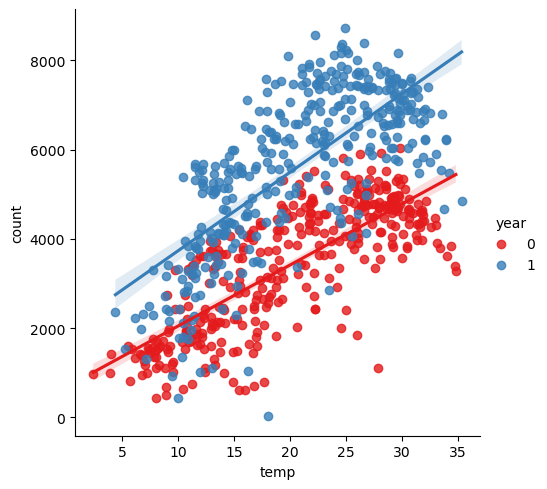

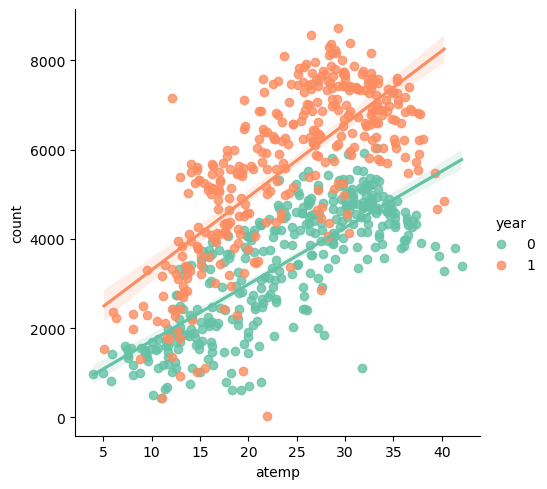

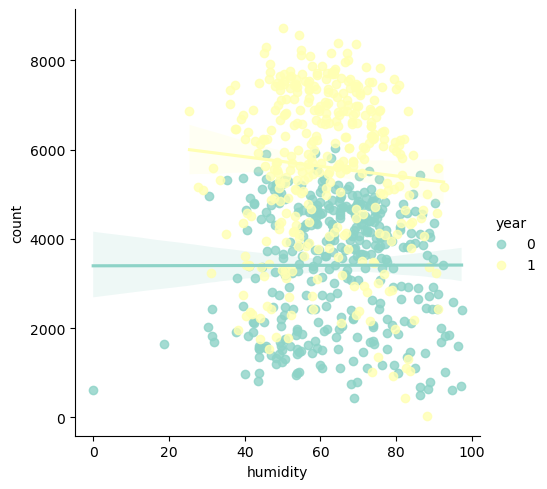

In [823]:
ax = sns.lmplot(x = 'temp', y = 'count', data=bike_sharing_df_cleaned, hue='year', palette='Set1')
ax = sns.lmplot(x = 'atemp', y = 'count', data=bike_sharing_df_cleaned, hue='year', palette='Set2')
ax = sns.lmplot(x = 'humidity', y = 'count', data=bike_sharing_df_cleaned, hue='year', palette='Set3')


* Increase in bike rental for similar values of temp,humidity and atemp from 2018 to 2019

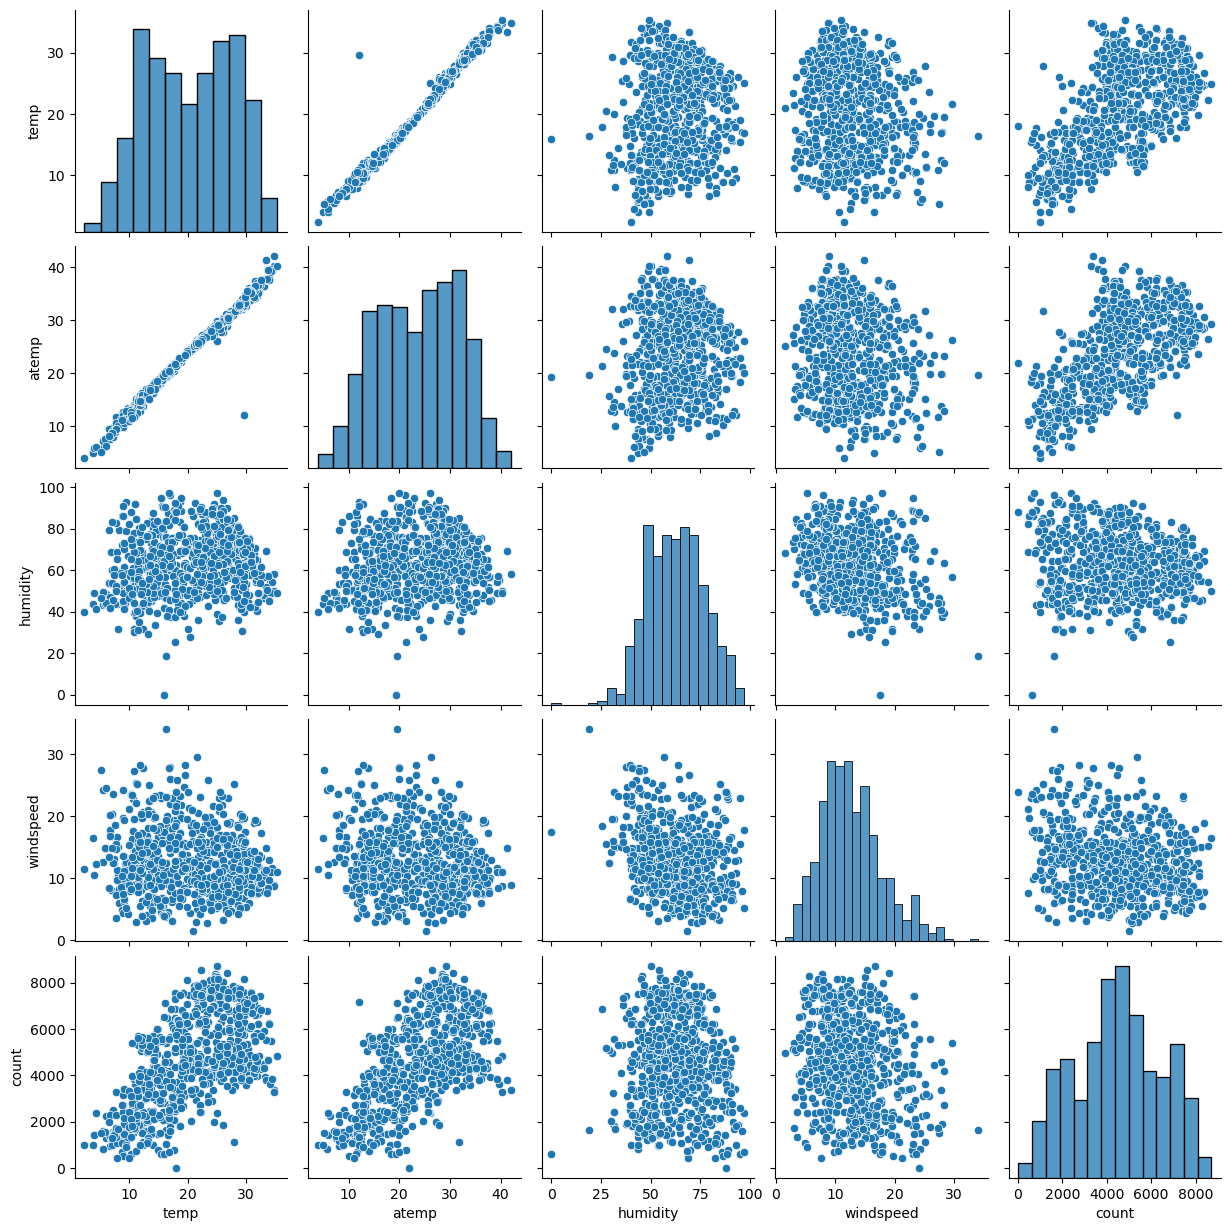

In [824]:
# Draw pairplot for continuous independent numeric variables against a dependent variable `cnt`

sns.pairplot(data=bike_sharing_df_cleaned,vars=['temp','atemp','humidity','windspeed','count'])
plt.show()

### Observation
* Number of bike rentals is increasing with temperature.
* High humid days are seeing most bike rental
Combining this with our earlier analysis of season and month, its clear that bike rental is happening during such favorable climate condition.
There is chance we are viewing data from a place like US , where we have harsh climate during other season like winter, which make is uncomfortable to travel on bike.

### Correlation

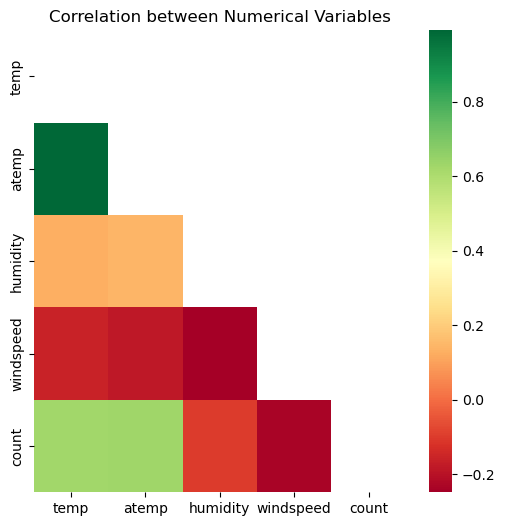

In [825]:
plt.figure(figsize = (6,6))
matrix = np.triu(bike_sharing_df_cleaned[['temp','atemp','humidity','windspeed','count']].corr())
sns.heatmap(bike_sharing_df_cleaned[['temp','atemp','humidity','windspeed','count']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

Temp and Atemp parameters cannot be used in the model due to multicolinearity. 
We will decide which parameters to keep based on VIF and p-value w.r.t other variables

## Step 3: Data Preparation

In [826]:
# Dummy variable creation for month, weekday, weathersit and season variables.

In [827]:
bike_sharing_df_cleaned.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

In [828]:
bike_sharing_df_cleaned[["season","month","weekday","weathersit","holiday","year","workingday"]].nunique()

season         4
month         12
weekday        7
weathersit     3
holiday        2
year           2
workingday     2
dtype: int64

In [829]:
#### we will create dummy variable for categorical variable having more than 2 unique values

In [830]:
bike_sharing_dummy = pd.get_dummies(data=bike_sharing_df_cleaned,columns=["season","month","weekday","weathersit"],drop_first=True)
bike_sharing_dummy.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,season_spring,season_summer,...,month_October,month_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wenesday,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,False,True,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,False,True,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,True,False


In [831]:
bike_sharing_dummy.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'count', 'season_spring', 'season_summer', 'season_winter',
       'month_August', 'month_December', 'month_February', 'month_January',
       'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wenesday', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

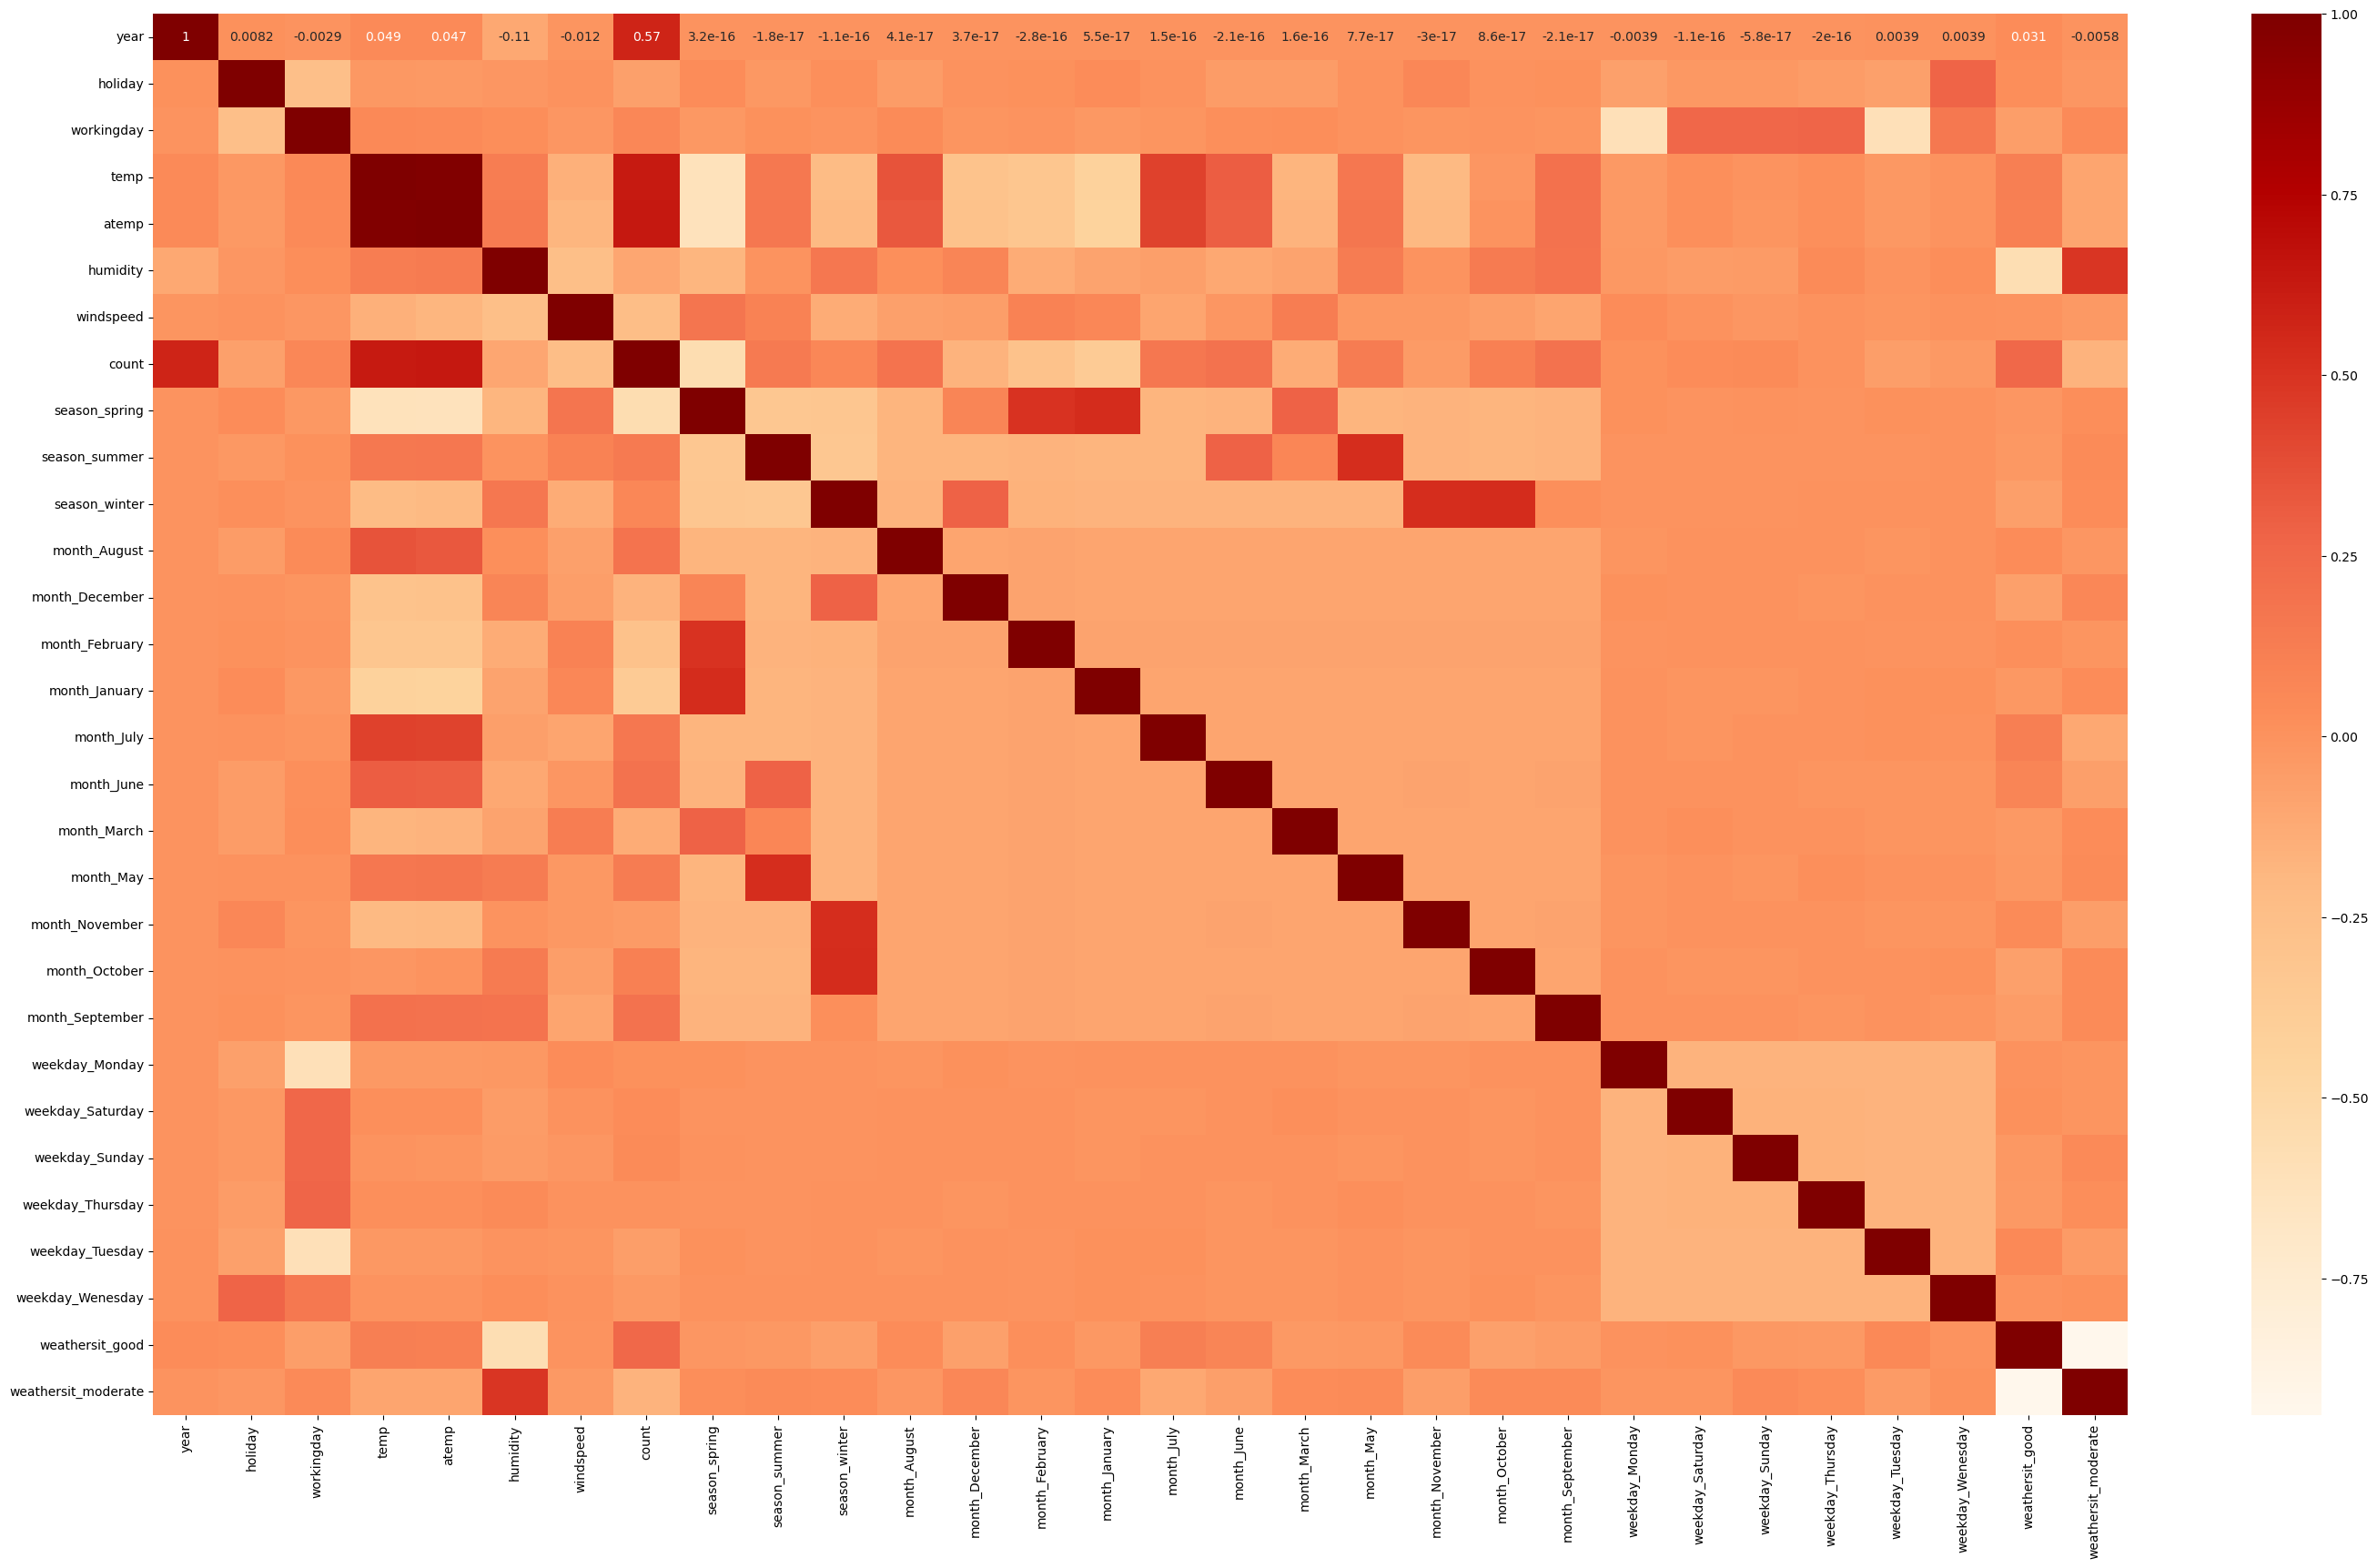

In [832]:
# Checking how are all these related to the dependent variable via correlation
plt.figure(figsize = (35, 20))
corr_df = bike_sharing_dummy[list(bike_sharing_dummy.columns)].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

## Step 3: Model Building and Evaluation

In [833]:
# Getting the feature variables in X and dependent variable `cnt` in y
X = bike_sharing_dummy.drop('count', axis = 1)
y = bike_sharing_dummy['count']

#### Splitting the dataset into training and test set

In [834]:
# Splitting the data into a 70% training set and a 30% test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [835]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(584, 29)
(584,)
(146, 29)
(146,)


#### Feature Scaling 
We need to see if data is noramlly distributed if yes then use standard scaler else minmaxscaler

In [836]:
from scipy import stats
stat, p = stats.shapiro(bike_sharing_dummy)
print('Shapiro-Wilk Test')
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk Test
Statistics=0.168, p=0.000
Sample does not look Gaussian (reject H0)


The Shapiro-Wilk test results indicate that the sample data you provided does not appear to be normally distributed.

In [837]:
#Use Normalized scaler to scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) 

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [838]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)

rfe = rfe.fit(X_train, y_train)

In [839]:
rfe.support_

array([ True, False, False,  True,  True,  True,  True,  True, False,
        True, False,  True, False, False,  True, False,  True, False,
        True, False,  True,  True, False, False, False, False, False,
        True,  True])

In [840]:
selected_features = X_train.columns[rfe.support_] 

# Print the selected features
print("Selected Features:", selected_features)

# Print feature rankings
print("Feature Rankings:", list(zip(X_train.columns, rfe.ranking_))) 

Selected Features: Index(['year', 'temp', 'atemp', 'humidity', 'windspeed', 'season_spring',
       'season_winter', 'month_December', 'month_July', 'month_March',
       'month_November', 'month_September', 'weekday_Monday',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')
Feature Rankings: [('year', 1), ('holiday', 4), ('workingday', 2), ('temp', 1), ('atemp', 1), ('humidity', 1), ('windspeed', 1), ('season_spring', 1), ('season_summer', 6), ('season_winter', 1), ('month_August', 11), ('month_December', 1), ('month_February', 13), ('month_January', 9), ('month_July', 1), ('month_June', 14), ('month_March', 1), ('month_May', 3), ('month_November', 1), ('month_October', 5), ('month_September', 1), ('weekday_Monday', 1), ('weekday_Saturday', 12), ('weekday_Sunday', 15), ('weekday_Thursday', 10), ('weekday_Tuesday', 7), ('weekday_Wenesday', 8), ('weathersit_good', 1), ('weathersit_moderate', 1)]


In [841]:
# Get the columns which are rejected using RFE approach
rejected_features = X_train.columns[~rfe.support_]
# Verifying column names which are rejected
rejected_features

Index(['holiday', 'workingday', 'season_summer', 'month_August',
       'month_February', 'month_January', 'month_June', 'month_May',
       'month_October', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wenesday'],
      dtype='object')

##### Common functions

In [842]:
def adjusted_r2_score(y_true, y_pred, n_features):
    """
    Calculate the adjusted R-squared (R2_adj) score.

    The adjusted R2 score is a modified version of the traditional R-squared that takes into account the number of
    predictors (independent variables) in a regression model. It penalizes the inclusion of unnecessary predictors
    that do not significantly contribute to explaining the variance.

    Parameters:
    - y_true (array-like): True target values.
    - y_pred (array-like): Predicted values.
    - n_features (int): Number of features (independent variables) in the model.

    Returns:
    - float: Adjusted R-squared score.
    """
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))
    return adjusted_r2
def calculate_VIF(df1):
    """
    Calculate Variance Inflation Factor (VIF) for features in the training set.

    VIF measures the extent to which the variance of an independent variable is inflated by the existence of other 
    independent variables in the model. High VIF values indicate strong correlation between variables.

    Parameters:
    - X_train (pd.DataFrame): Input features in the training set.

    Returns:
    - pd.DataFrame: DataFrame containing Features and their corresponding VIF values.
    """
    vif = pd.DataFrame()
    vif["Features"] = df1.columns
    vif["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
    
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = 'VIF', ascending = False)
def generate_model_with_summary(xtrain, ytrain):
    """
    Generate and fit an Ordinary Least Squares (OLS) model using statsmodels,
    print the model summary, and return a dictionary with the fitted model and
    the features with an added constant term.

    Parameters:
    - xtrain (DataFrame): Features for training.
    - ytrain (Series): Target variable for training.

    Returns:
    dict: A dictionary containing the fitted OLS model ('model') and the features
          with added constant term ('X_train_sm').
    """
    X_train_sm = sm.add_constant(xtrain)
    lm = sm.OLS(ytrain, X_train_sm).fit()
    print(lm.summary())
    return { 'model' : lm, 'X_train_sm' : X_train_sm }


In [843]:

X_train[selected_features].corr()


,year,temp,atemp,humidity,windspeed,season_spring,season_winter,month_December,month_July,month_March,month_November,month_September,weekday_Monday,weathersit_good,weathersit_moderate
year,1.000000,0.051530,0.053827,-0.099325,-0.028038,-0.004938,0.005611,0.032091,0.015997,0.007563,-0.031553,0.017149,0.009695,0.004503,0.022285
temp,0.051530,1.000000,0.996569,0.112065,-0.160957,-0.630443,-0.226537,-0.266475,0.439789,-0.157843,-0.225940,0.207829,-0.048027,0.093137,-0.066947
atemp,0.053827,0.996569,1.000000,0.123407,-0.185432,-0.638486,-0.207633,-0.258360,0.434128,-0.156594,-0.217135,0.200835,-0.049542,0.095769,-0.066050
humidity,-0.099325,0.112065,0.123407,1.000000,-0.207069,-0.160741,0.162745,0.123378,-0.078833,-0.052174,-0.029401,0.168099,-0.021440,-0.575011,0.485876
windspeed,-0.028038,-0.160957,-0.185432,-0.207069,1.000000,0.127520,-0.118046,-0.065916,-0.098460,0.034049,-0.011634,-0.082834,0.025553,-0.046552,-0.004906
season_spring,-0.004938,-0.630443,-0.638486,-0.160741,0.127520,1.000000,-0.319370,0.075664,-0.174183,0.235787,-0.170605,-0.166978,0.020030,-0.012779,0.016116
season_winter,0.005611,-0.226537,-0.207633,0.162745,-0.118046,-0.319370,1.000000,0.264507,-0.186813,-0.154399,0.534192,-0.010625,-0.004830,-0.055688,0.022467
month_December,0.032091,-0.266475,-0.258360,0.123378,-0.065916,0.075664,0.264507,1.000000,-0.091115,-0.075305,-0.089243,-0.087346,0.012409,-0.099404,0.079966
month_July,0.015997,0.439789,0.434128,-0.078833,-0.098460,-0.174183,-0.186813,-0.091115,1.000000,-0.084208,-0.099794,-0.097673,-0.012922,0.113967,-0.106820
month_March,0.007563,-0.157843,-0.156594,-0.052174,0.034049,0.235787,-0.154399,-0.075305,-0.084208,1.000000,-0.082479,-0.080725,-0.048781,-0.067122,0.057299


* weather moderate is having  high positive correlation with humidity
* weather good is having high negative correlation with humidity
* season spring has  high negative correlationship with temp columns
* year and temperature has high positive correlationship
* season winter and november high positive correlationship
* december and spring high positive correlationship

  We can use this in model prediction

#### Manual Feature Elimination using statsmodels and VIF
  Steps to be taken while performing Manual Feature Elimination:

  * Multicollinearity: Address high correlation between features.
  * Overfitting: Prevent the model from fitting noise in the data.
  * Interpretability: Simplify the model for better understanding.
  * Model Performance: Improve computational efficiency and generalization.
  * Data Quality: Eliminate irrelevant or redundant features for cleaner data.
##### Manual feature elimination requires identifying features with p-values exceeding 0.05, rendering their coefficients statistically insignificant, and having VIF values surpassing 5.

#### Model 1

In [844]:
model1 = X_train[selected_features]
generate_model_with_summary(model1, y_train)
calculate_VIF(model1)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.18e-209
Time:                        04:31:43   Log-Likelihood:                -4730.3
No. Observations:                 584   AIC:                             9493.
Df Residuals:                     568   BIC:                             9563.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1192.9487    

,Features,VIF
2,atemp,1263.85
1,temp,1215.33
3,humidity,22.05
13,weathersit_good,12.94
14,weathersit_moderate,8.11
4,windspeed,5.52
5,season_spring,3.24
6,season_winter,2.90
0,year,2.10
10,month_November,1.82


##### Removing atemp due to its high VIF value

### Model 2

In [845]:
model2 = model1.drop(['atemp'], axis = 1)
generate_model_with_summary(model2, y_train)
calculate_VIF(model2)


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     202.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.40e-210
Time:                        04:31:43   Log-Likelihood:                -4731.4
No. Observations:                 584   AIC:                             9493.
Df Residuals:                     569   BIC:                             9558.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1179.7953    

,Features,VIF
1,temp,21.60
2,humidity,21.36
12,weathersit_good,12.40
13,weathersit_moderate,7.95
3,windspeed,5.08
4,season_spring,3.21
5,season_winter,2.87
0,year,2.10
9,month_November,1.82
7,month_July,1.51


##### Even though temp has high VIF, we should not remove it. We should go with humidity as it has second most value for VIF, high negative coefficient and does
##### does not have a linear relationship as per our EDA analysis

#### Model 3

In [846]:
model3 = model2.drop(['humidity'], axis = 1)
generate_model_with_summary(model3, y_train)
calculate_VIF(model3)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     210.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.28e-207
Time:                        04:31:43   Log-Likelihood:                -4740.7
No. Observations:                 584   AIC:                             9509.
Df Residuals:                     570   BIC:                             9571.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.9593    

,Features,VIF
1,temp,14.03
11,weathersit_good,12.21
12,weathersit_moderate,6.95
2,windspeed,4.99
3,season_spring,2.65
4,season_winter,2.50
0,year,2.08
8,month_November,1.81
6,month_July,1.47
5,month_December,1.36


##### Removing weathersit_moderate for high VIF value and low coeff

##### Model 4

In [847]:
model4 = model3.drop(['weathersit_moderate'], axis = 1)
generate_model_with_summary(model4, y_train)
calculate_VIF(model4)


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     194.0
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.88e-192
Time:                        04:31:43   Log-Likelihood:                -4779.3
No. Observations:                 584   AIC:                             9585.
Df Residuals:                     571   BIC:                             9641.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1731.9332    239.410     

,Features,VIF
1,temp,6.26
2,windspeed,4.71
11,weathersit_good,2.69
4,season_winter,2.34
0,year,2.05
3,season_spring,1.85
8,month_November,1.76
6,month_July,1.43
5,month_December,1.33
9,month_September,1.22


##### Removing weekday_Monday due high p value

##### Model 5

In [848]:
model5 = model4.drop(['weekday_Monday'], axis = 1)
generate_model_with_summary(model5, y_train)
calculate_VIF(model5)


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          5.11e-193
Time:                        04:31:43   Log-Likelihood:                -4780.8
No. Observations:                 584   AIC:                             9586.
Df Residuals:                     572   BIC:                             9638.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1772.1182    238.587     

,Features,VIF
1,temp,6.23
2,windspeed,4.68
10,weathersit_good,2.69
4,season_winter,2.34
0,year,2.05
3,season_spring,1.84
8,month_November,1.76
6,month_July,1.43
5,month_December,1.33
9,month_September,1.22


##### Removing weekday_Monday 

#### Model 6

In [849]:

model6 = model5.drop(['windspeed'], axis = 1)
generate_model_with_summary(model6, y_train)
calculate_VIF(model6)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     214.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.66e-186
Time:                        04:31:43   Log-Likelihood:                -4798.9
No. Observations:                 584   AIC:                             9620.
Df Residuals:                     573   BIC:                             9668.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1048.7311    212.868     

,Features,VIF
1,temp,3.89
9,weathersit_good,2.68
3,season_winter,2.32
0,year,2.05
7,month_November,1.74
2,season_spring,1.46
5,month_July,1.39
4,month_December,1.33
8,month_September,1.22
6,month_March,1.15


##### Removing month_September due to low coeff

#### Model 7

In [850]:

model7 = model6.drop(['month_September'], axis = 1)
model_lr = generate_model_with_summary(model7, y_train)
calculate_VIF(model7)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     235.1
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          4.77e-186
Time:                        04:31:43   Log-Likelihood:                -4802.8
No. Observations:                 584   AIC:                             9626.
Df Residuals:                     574   BIC:                             9669.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1032.4929    214.028     

,Features,VIF
1,temp,3.54
8,weathersit_good,2.68
3,season_winter,2.31
0,year,2.05
7,month_November,1.72
2,season_spring,1.46
5,month_July,1.34
4,month_December,1.32
6,month_March,1.15


##### Removing month_March due to low coeff and to adjust durbin watson value

#### Model 8

In [851]:
model8 = model7.drop(['month_March'], axis = 1)
model_lr = generate_model_with_summary(model8, y_train)
calculate_VIF(model8)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     260.6
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.10e-185
Time:                        04:31:43   Log-Likelihood:                -4806.6
No. Observations:                 584   AIC:                             9631.
Df Residuals:                     575   BIC:                             9670.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1105.1287    213.522     

,Features,VIF
1,temp,3.50
7,weathersit_good,2.67
3,season_winter,2.31
0,year,2.04
6,month_November,1.72
2,season_spring,1.35
5,month_July,1.33
4,month_December,1.32


##### Removing month_July for low coef and to adjust durbin watson value

#### Model 9

In [852]:
model9 = model8.drop(['month_July'], axis = 1)
final_lr_model = generate_model_with_summary(model9, y_train)
calculate_VIF(model9)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     288.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.03e-183
Time:                        04:31:43   Log-Likelihood:                -4814.1
No. Observations:                 584   AIC:                             9644.
Df Residuals:                     576   BIC:                             9679.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1314.3710    209.107     

,Features,VIF
1,temp,3.08
6,weathersit_good,2.67
3,season_winter,2.23
0,year,2.04
5,month_November,1.72
2,season_spring,1.33
4,month_December,1.32


*The model is deemed satisfactory with a remarkably low Prob (F-statistic) of 1.03e-183, features displaying low p-values and VIF, and 
and Adjusted . This will serve as the final evaluation model.*

### Model Evaluation

#### Residual Analysis
Residual analysis is performed to assess the goodness of fit and identify patterns or anomalies in the model's predictions.

In [853]:
# Fetch the final model and the X_train_sm from the final_lr_model
model, X_train_sm = final_lr_model.values()

In [854]:
# Calculate y_train_pred
y_train_pred = model.predict(X_train_sm)

Linear regression models are based on several key assumptions:

* Linearity: The relationship between the independent and dependent variables is assumed to be linear.

* Independence: Residuals (the differences between observed and predicted values) should be independent of each other.

* Homoscedasticity: The variance of residuals should be constant across all levels of the independent variables, indicating consistent levels of variability.

* Normality of Residuals: The residuals should be approximately normally distributed.

* No Perfect Multicollinearity: Independent variables should not exhibit high correlation with each other, avoiding multicollinearity issues.

Violation of these assumptions can affect the accuracy and reliability of the linear regression model,

<Figure size 800x500 with 0 Axes>

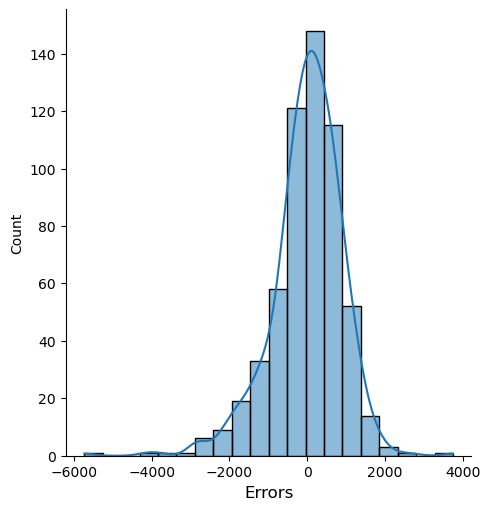

In [855]:
# Plot the histogram of the error terms on the training set
residuals = y_train - y_train_pred
fig = plt.figure(figsize = (8, 5))
sns.displot(residuals, bins = 20, kde = True)
plt.xlabel('Errors', fontsize = 12)
plt.show()

* The error terms follow the principle of a normal distribution curve.

#### Homoscedasticity

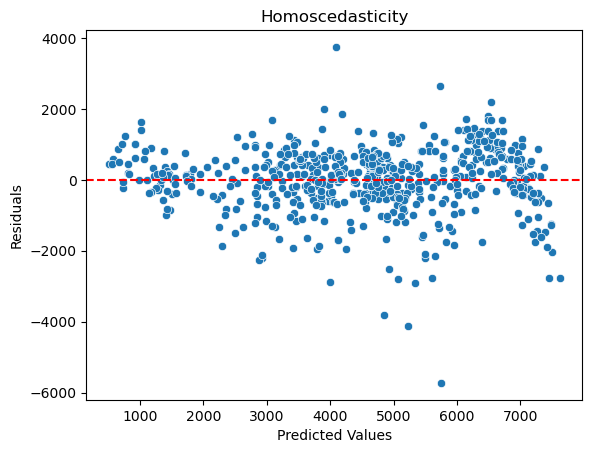

In [856]:
# Visualize Homoscedasticity
sns.scatterplot(x = y_train_pred, y = residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

* The variance of residuals is constant across all levels of the independent variables, indicating consistent levels of variability.

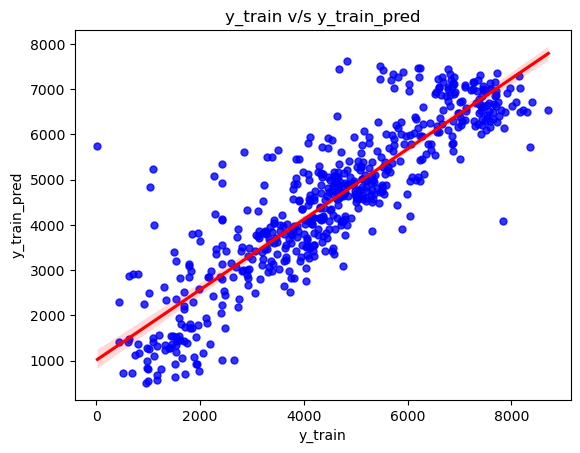

In [857]:
# Visualize the trained model using a scatter plot with a linear regression fit line
sns.regplot(x = y_train, y = y_train_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_train v/s y_train_pred')
plt.xlabel('y_train')
plt.ylabel('y_train_pred') 
plt.show()

In [858]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)

print(rmse_train)

920.0105589921895


In [859]:
# Retain only the selected feature from the final model
X_test = X_test[model9.columns]
X_test.head()

,year,temp,season_spring,season_winter,month_December,month_November,weathersit_good
468,1.0,0.543115,0.0,0.0,0.0,0.0,1.0
148,0.0,0.758058,0.0,0.0,0.0,0.0,1.0
302,0.0,0.324018,0.0,1.0,0.0,0.0,1.0
355,0.0,0.453814,1.0,0.0,1.0,0.0,0.0
515,1.0,0.773634,0.0,0.0,0.0,0.0,1.0


In [860]:
X_test_sm = sm.add_constant(X_test)
# Get the predicted values from the linear model
y_test_pred = model.predict(X_test_sm)

#### Calculating $R^2$ Scores and Adjusted $R^2$ Scores for the test sett


In [861]:
# Calculate R2 Score for the test set
r2_score_test = r2_score(y_true = y_test, y_pred = y_test_pred)
r2_score_test = round(r2_score_test, 2)
r2_score_test

0.83

In [862]:
# Calculate Adjusted R2 Score for the test set
adj_r2_score_test = round(adjusted_r2_score(y_test, y_test_pred, n_features = len(X_test.columns)), 2)
adj_r2_score_test

0.83

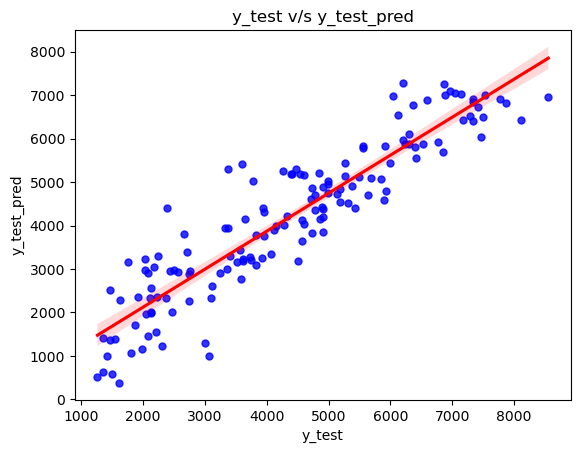

In [863]:
# Visualize the predicted model using a scatter plot with a linear regression fit line
sns.regplot(x = y_test, y = y_test_pred, line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })

# Show the plot
plt.title('y_test v/s y_test_pred')
plt.xlabel('y_test')
plt.ylabel('y_test_pred') 
plt.show()

In [864]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)
# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print(rmse_test)

753.4608834557985


In [865]:
# Coefficients of the final model
round(model.params, 2)

const              1314.37
year               2074.31
temp               3456.38
season_spring     -1261.71
season_winter       722.16
month_December     -624.52
month_November     -758.49
weathersit_good     776.01
dtype: float64

**the best fit line is determined by the following equation:**
* **count = 1314.37 x const + year x 2074.31 + 3456.38 x temp   - 1261.71 x season_spring + 722.16 x season_winter  - 624.52 x  month_December - 758.49 x month_November + 776.01 x weathersit_good**

### Conclusion

The equation of the best fit line is given by:
* count = 1314.37 x const + year x 2074.31 + 3456.38 x temp - 1261.71 x season_winter + 722.16 x season_winter - 624.52 x month_December - 758.49 x month_November + 776.01 x weathersit_good
##### Bike demand is influenced by features such as yr, workingday, temp, Spring, Summer, Winter, December, November and Good Weather.
Three key feature variables, temp, yr, and weathersit_good, exhibit the highest coefficient values, indicating their significant impact.


#### Recommendations

* Leverage High-Impact Features: Focus on features such as temp, yr, and Winter as they exhibit the highest coefficient values, indicating significant impact on bike demand.
* Seasonal Strategies: Develop targeted marketing and pricing strategies for different seasons, particularly emphasizing promotions during Spring and Winter
* Optimize Operational Planning: Adjust bike availability and distribution based on the significant features identified, optimizing resources for peak demand periods.
* Weather-Sensitive Promotions: Implement weather-specific promotions or incentives to encourage bike usage during favorable weather conditions, addressing the impact of temp, hum, and windspeed.
  